In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [4]:
covertype_df = pd.read_csv('/users/linggeli/downloads/covtype.csv')

In [582]:
select = (covertype_df['Cover_Type'].values == 1) | (covertype_df['Cover_Type'].values == 2)
covertype_subset = covertype_df[select]
print(covertype_subset.shape)

(495141, 55)


### So far we have only trained and evaluated models on the same data set. In practice, we want to reserve a test data set to evaluate models fairly.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [583]:
covertype_train = covertype_subset.iloc[0:100000:100, :].values
covertype_test = covertype_subset.iloc[100000::100, :].values
print(covertype_train.shape)
print(covertype_test.shape)

(1000, 55)
(3952, 55)


In [584]:
X_train = covertype_train[:, :54]
y_train = covertype_train[:, 54]
X_test = covertype_test[:, :54]
y_test = covertype_test[:, 54]

In [585]:
from sklearn.preprocessing import StandardScaler

In [586]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)    
X_test = scaler.transform(X_test)    

In [587]:
from sklearn.linear_model import LogisticRegression

In [590]:
clf = LogisticRegression().fit(X_train, y_train)

In [591]:
yhat = clf.predict(X_train)
print(np.mean(y_train == yhat))

0.862


In [592]:
yhat = clf.predict(X_test)
print(np.mean(y_test == yhat))

0.6697874493927125


### Models tend to do better on training data than test data, which is called "overfitting." One approach to reduce overfitting is regularization, framing model training as constrained optimization.
    
https://en.wikipedia.org/wiki/Overfitting

https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization

In [603]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=1.0).fit(X_train, y_train)
clf2 = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=0.1).fit(X_train, y_train)

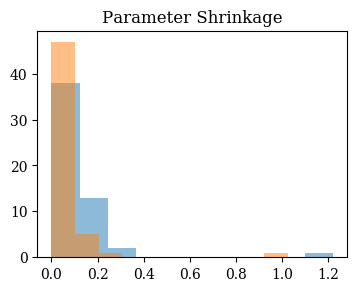

In [604]:
fig = plt.figure(figsize=(4, 3), dpi=100)
plt.hist(np.absolute(clf1.coef_).flatten(), alpha=0.5)
plt.hist(np.absolute(clf2.coef_).flatten(), alpha=0.5)
plt.title('Parameter Shrinkage')
plt.show()

In [605]:
yhat = clf2.predict(X_train)
print(np.mean(y_train == yhat))

0.86


In [606]:
yhat = clf2.predict(X_test)
print(np.mean(y_test == yhat))

0.6839574898785425


### Cross-validation is a common way for choosing the penalty weight. It is used for hyper-parameter optimization in general.

https://scikit-learn.org/stable/modules/cross_validation.html

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [607]:
from sklearn.linear_model import LogisticRegressionCV

In [608]:
clf = LogisticRegressionCV().fit(X_train, y_train)
print(clf.C_)

[0.35938137]


### Machine learning boils down to how to balance the trade-off between bias and variance. Simple models have higher bias but smaller variance; complex models have lower bias but higher variance. As model error is composed of bias and variance, selecting a model with the right complexity would yield the best performance.

http://scott.fortmann-roe.com/docs/BiasVariance.html

In [550]:
covertype_train = covertype_subset.iloc[0:10000, :].values
covertype_test = covertype_subset.iloc[10000::100, :].values
print(covertype_train.shape)
print(covertype_test.shape)

(10000, 55)
(4852, 55)


In [551]:
X_train = covertype_train[:, :54]
y_train = covertype_train[:, 54]
X_test = covertype_test[:, :54]
y_test = covertype_test[:, 54]

In [552]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)    
X_test = scaler.transform(X_test)    

In [553]:
from sklearn.neighbors import KNeighborsClassifier

In [554]:
acc_lg = []
acc_knn = []
for i in range(100):
    select = np.random.choice(10000, 50)
    clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train[select], y_train[select])
    knn = KNeighborsClassifier(n_neighbors=1).fit(X_train[select], y_train[select])
    yhat = clf.predict(X_test)
    acc_lg.append(np.mean(y_test == yhat))
    yhat = knn.predict(X_test)
    acc_knn.append(np.mean(y_test == yhat))

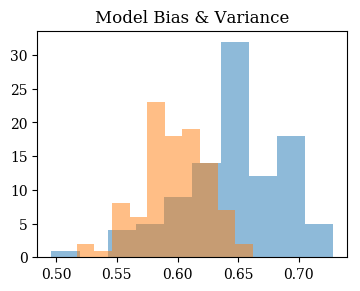

In [575]:
fig = plt.figure(figsize=(4, 3), dpi=100)
plt.hist(acc_lg, alpha=0.5)
plt.hist(acc_knn, alpha=0.5)
plt.title('Model Bias & Variance')
plt.show()

### Tree-based models are more flexible than logistic regression and often produce the best results in practice.

https://scikit-learn.org/stable/modules/tree.html

https://www.youtube.com/watch?v=jkJ4dbbpVCQ

https://www.youtube.com/watch?v=LDRbO9a6XPU

In [556]:
covertype_subset = covertype_df.iloc[0:500000:100, :]
print(covertype_subset.shape)

(5000, 55)


In [509]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [557]:
X = covertype_subset.iloc[:, 0:54].values
y = covertype_subset.iloc[:, 54].values
print(X.shape)
print(y.shape)

(5000, 54)
(5000,)


In [558]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)    

In [559]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.07462831 0.05784207]


In [560]:
scores = pca.transform(X)
print(scores.shape)

(5000, 2)


In [561]:
select = (covertype_subset['Cover_Type'].values == 1) | (covertype_subset['Cover_Type'].values == 3)
X_train = scores[select]
y_train = y[select]

In [562]:
from sklearn.tree import DecisionTreeClassifier

In [572]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [573]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

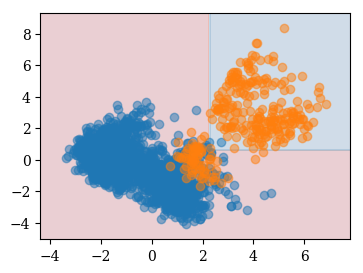

In [574]:
fig = plt.figure(figsize=(4, 3), dpi=100)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.2)
for i in [1, 3]:
    plt.scatter(scores[covertype_subset['Cover_Type'].values == i, 0], 
                scores[covertype_subset['Cover_Type'].values == i, 1], alpha=0.5)
plt.show()

### Random forest is built on the idea of bagging and combines many "weak" tree classifiers. Support vector machine and neural networks, instead of partitioning the data space, projects data into a different space and uses a linear classifier on the transformed data.

https://stats.stackexchange.com/questions/77280/main-idea-of-bagging

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### *Mini-project. Try different classifiers on the cover type data.*